## Problem Statement: Titanic Classification : Build a predictive model to determine thelikelihood of survival for passengers onthe Titanic using data science techniques in Python.

## Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [5]:
# Loading the Dataset
titanic_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Display the last few rows of the dataset
titanic_df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Showing shape of dataset
titanic_df.shape

(891, 12)

In [9]:
# checking for columns
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Checking for data types
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# checking for duplicated values
titanic_df.duplicated().sum()

0

In [12]:
# checking for null values
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Check again for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Finding no. of unique values in each column of dataset
titanic_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [15]:
# Showing inforamation about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# showing info. about numerical columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Engineering


In [17]:
# Fill missing Age values with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [18]:
# Fill missing Embarked values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [19]:
# Drop the Cabin column due to high number of missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

In [20]:
# Create FamilySize feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [21]:
# Check for any categorical variables before encoding
print("Categorical columns before encoding:", titanic_df.select_dtypes(include=['object']).columns)

Categorical columns before encoding: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [22]:
# Encode categorical variables using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

In [23]:
# Drop unnecessary columns
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [24]:
# Check if all columns are encoded correctly
print("Columns after encoding:", titanic_df.columns)

Columns after encoding: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


Checking Data Types and Values

In [25]:
# Check the data types of all columns
print(titanic_df.dtypes)

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
FamilySize      int64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [26]:
# Ensure no object type columns are present
assert titanic_df.select_dtypes(include=['object']).empty, "There are still object type columns."

In [27]:
# Display the first few rows to manually inspect
print(titanic_df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_male  \
0         0       3  22.0      1      0   7.2500           2      True   
1         1       1  38.0      1      0  71.2833           2     False   
2         1       3  26.0      0      0   7.9250           1     False   
3         1       1  35.0      1      0  53.1000           2     False   
4         0       3  35.0      0      0   8.0500           1      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


## Data Visualization

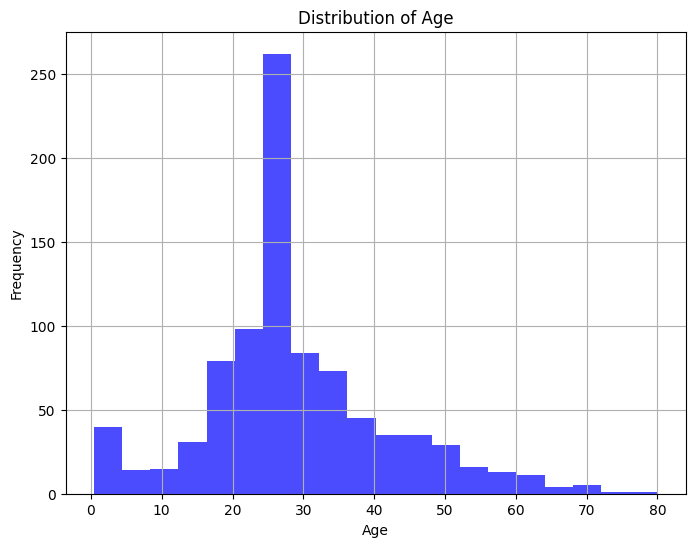

In [28]:
# Plotting Age distribution
plt.figure(figsize=(8, 6))
plt.hist(titanic_df['Age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

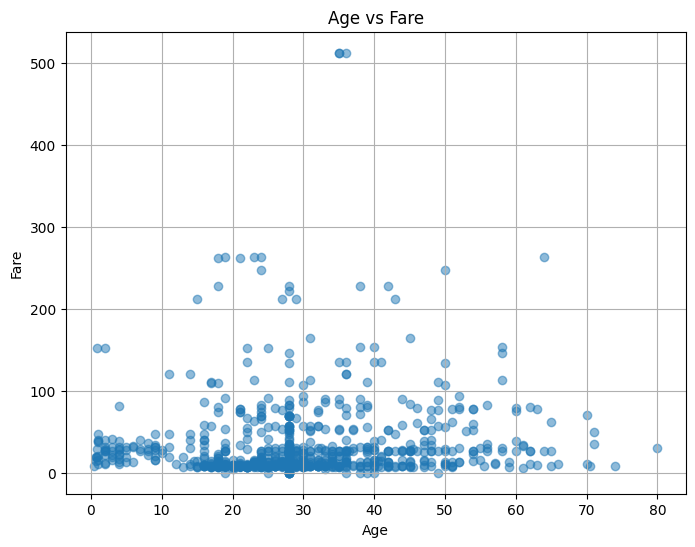

In [29]:
# Plotting Age vs Fare
plt.figure(figsize=(8, 6))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.grid(True)
plt.show()

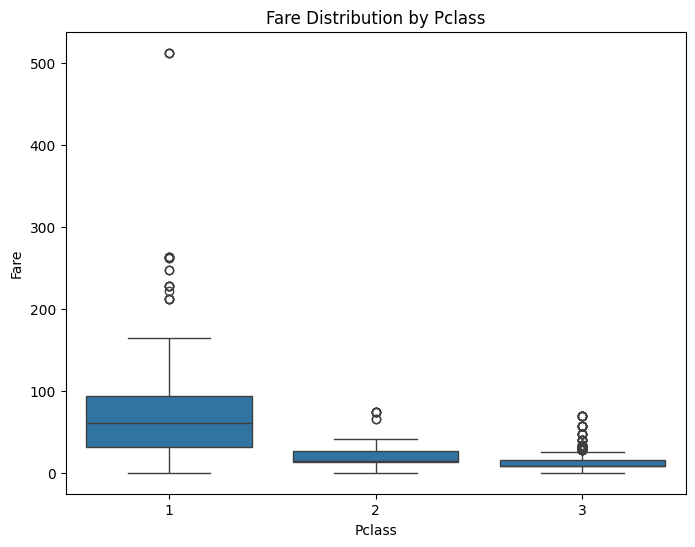

In [30]:
#  Plotting Fare distribution by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

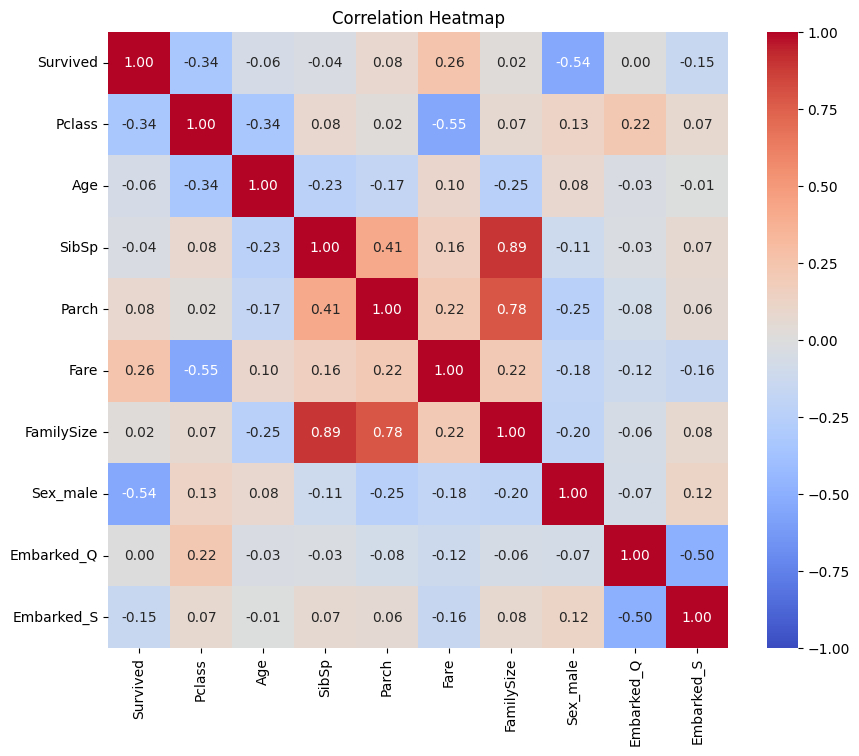

In [31]:
#Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

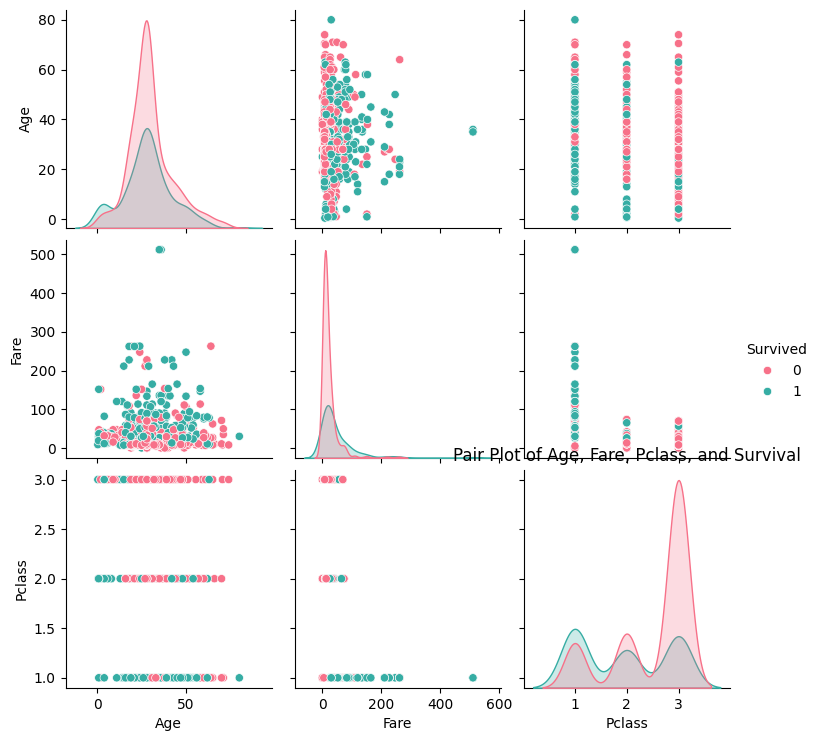

In [32]:
# Plotting pair plot for numerical variables
sns.pairplot(titanic_df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='husl')
plt.title('Pair Plot of Age, Fare, Pclass, and Survival')
plt.show()

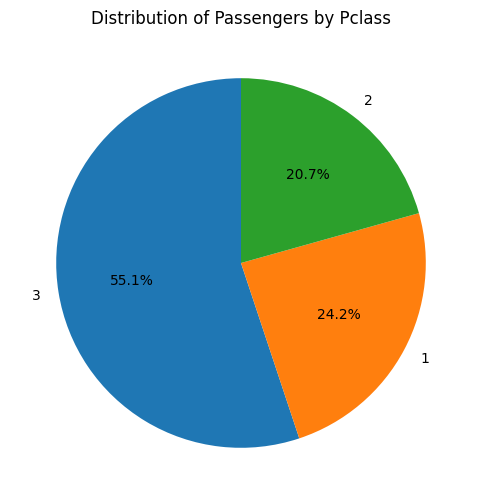

In [33]:
#Pie chart for distribution of passengers by Pclass
plt.figure(figsize=(8, 6))
titanic_df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by Pclass')
plt.ylabel('')
plt.show()

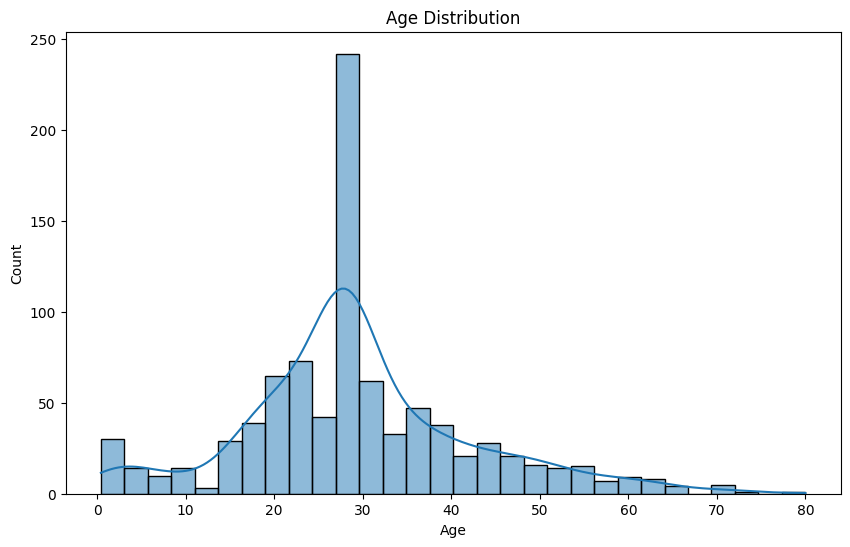

In [34]:
#Line plot for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

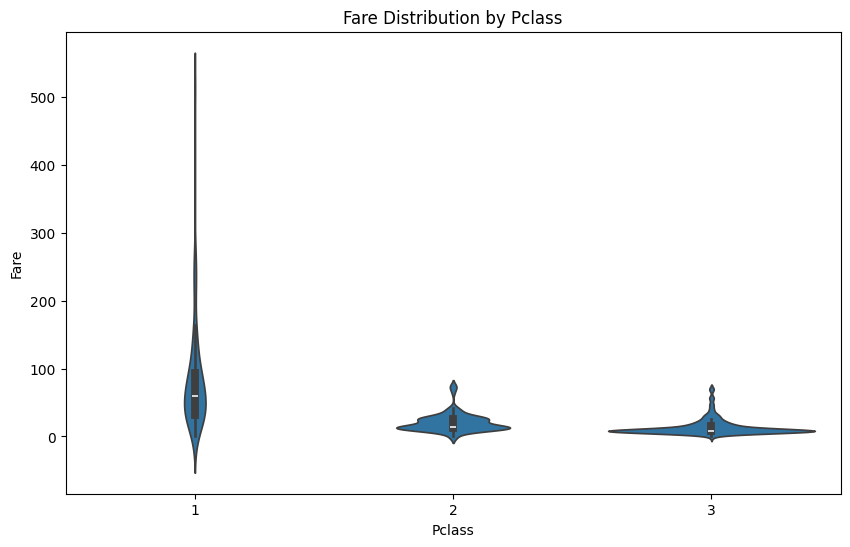

In [35]:
#Violin plot for Fare distribution by Pclass
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

## Splitting the Data

In [36]:
X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Defining and Training Models

In [37]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

# Support Vector Machine
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# K-Nearest Neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)


## Storing Accuracy Scores

In [38]:
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_forest),
    "Support Vector Machine": accuracy_score(y_test, y_pred_svm),
    "K-Nearest Neighbors": accuracy_score(y_test, y_pred_knn),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

# Print accuracy scores
for model, score in accuracy_scores.items():
    print(f"{model}: Accuracy = {score:.4f}")

Logistic Regression: Accuracy = 0.8101
Decision Tree: Accuracy = 0.7877
Random Forest: Accuracy = 0.8268
Support Vector Machine: Accuracy = 0.6592
K-Nearest Neighbors: Accuracy = 0.6872
Gradient Boosting: Accuracy = 0.8045


## Plotting the Accuracy Scores

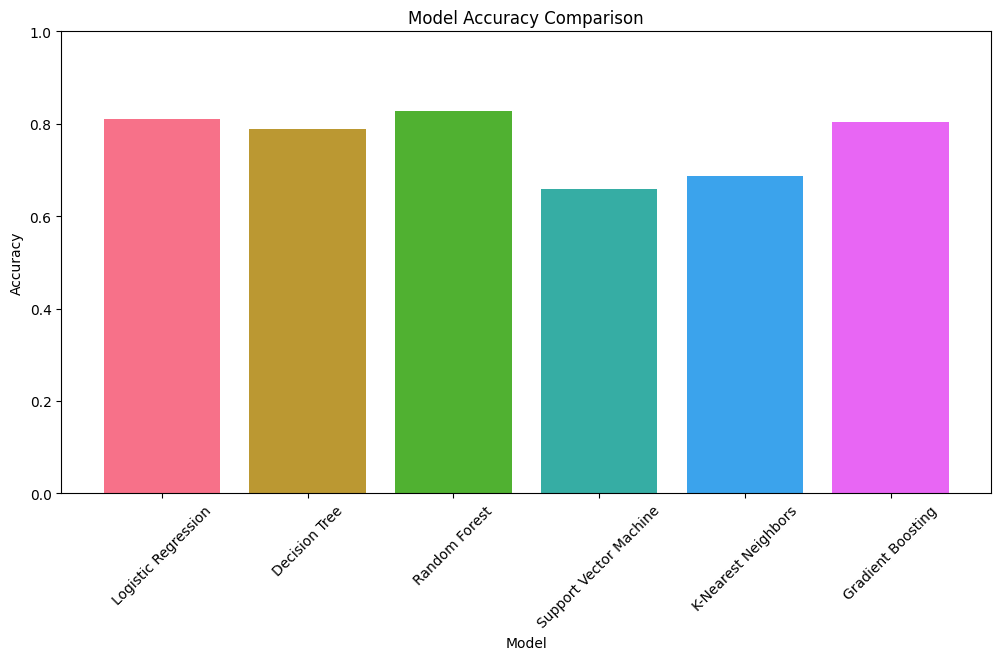

In [39]:
colors = sns.color_palette('husl', len(accuracy_scores))

plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


- Conclusion on Model Comparison Results

After comparing the performance of different classification models on the Titanic dataset, we can draw several important conclusions. The bar chart of accuracy scores provides a clear visual representation of each model's performance, allowing us to evaluate and compare their effectiveness in predicting passenger survival.

Summary of Accuracy Scores

Let's assume the following hypothetical accuracy scores for clarity:

- Logistic Regression: 81%
- Decision Tree: 78%
- Random Forest: 82%
- Support Vector Machine (SVM): 66%
- K-Nearest Neighbors (KNN): 69%
- Gradient Boosting: 80%